In [171]:
import pandas as pd
import numpy as np

In [172]:
df = pd.read_csv("Bankruptcy.data.txt.csv", delimiter = ',', names = ['IndustrialRisk', 'ManagmentRisk', 'FinancialFlexibility', 'Credibility', 'Competitiveness', 'OperatingRisk', 'Class'])

In [173]:
df.head()

,IndustrialRisk,ManagmentRisk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [174]:
df.loc[df.IndustrialRisk == 'P', 'IndustrialRisk'] = 2
df.loc[df.IndustrialRisk == 'A', 'IndustrialRisk'] = 1
df.loc[df.IndustrialRisk == 'N', 'IndustrialRisk'] = 0


In [175]:
df.loc[df.ManagmentRisk == 'P', 'ManagmentRisk'] = 2
df.loc[df.ManagmentRisk == 'A', 'ManagmentRisk'] = 1
df.loc[df.ManagmentRisk == 'N', 'ManagmentRisk'] = 0

In [176]:
df.loc[df.FinancialFlexibility == 'P', 'FinancialFlexibility'] = 2
df.loc[df.FinancialFlexibility == 'A', 'FinancialFlexibility'] = 1
df.loc[df.FinancialFlexibility == 'N', 'FinancialFlexibility'] = 0

In [177]:
df.loc[df.Credibility == 'P', 'Credibility'] = 2
df.loc[df.Credibility == 'A', 'Credibility'] = 1
df.loc[df.Credibility== 'N', 'Credibility'] = 0

In [178]:

df.loc[df.Competitiveness == 'P', 'Competitiveness'] = 2
df.loc[df.Competitiveness == 'A', 'Competitiveness'] = 1
df.loc[df.Competitiveness == 'N', 'Competitiveness'] = 0

In [179]:
df.loc[df.OperatingRisk == 'P', 'OperatingRisk'] = 2
df.loc[df.OperatingRisk == 'A', 'OperatingRisk'] = 1
df.loc[df.OperatingRisk == 'N', 'OperatingRisk'] = 0

In [181]:
df.head()

,IndustrialRisk,ManagmentRisk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk,Class
0,2,2,1,1,1,2,2
1,0,0,1,1,1,0,2
2,1,1,1,1,1,1,2
3,2,2,2,2,2,2,2
4,0,0,2,2,2,0,2


In [182]:
labels = np.array(df['Class'])
features = df.drop('Class', axis = 1)
featureList = list(features.columns)
features = np.array(features)

In [183]:
print(features)
print(labels)

[[2 2 1 1 1 2]
 [0 0 1 1 1 0]
 [1 1 1 1 1 1]
 ...
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [2 0 0 0 1 1]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [184]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = .25, random_state = 42)
train_labels = train_labels.astype('int')

In [185]:
print ("training features shape: ", train_features.shape)
print ("training labels shape: ", train_labels.shape)
print ("testing features shape: ", test_features.shape)
print ("testing labels shape: ", test_labels.shape)

training features shape:  (187, 6)
training labels shape:  (187,)
testing features shape:  (63, 6)
testing labels shape:  (63,)


In [186]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 1000, random_state= 42)

rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [187]:
predictions = rf.predict(test_features)
print (predictions)

errors = abs(predictions - test_labels)
print (errors)

print("Mean Absolute Error: ", round(np.mean(errors), 2), 'degrees')

[2 2 2 2 2 1 1 1 2 2 1 1 1 1 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2
 1 1 1 2 2 2 1 1 2 1 2 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Mean Absolute Error:  0.0 degrees


In [188]:
mape = 100* (errors / test_labels)
print (mape)

accuracy = 100 - np.mean(mape)
print (accuracy)

print ('Accuracy: ', accuracy, '%')

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
100.0
Accuracy:  100.0 %


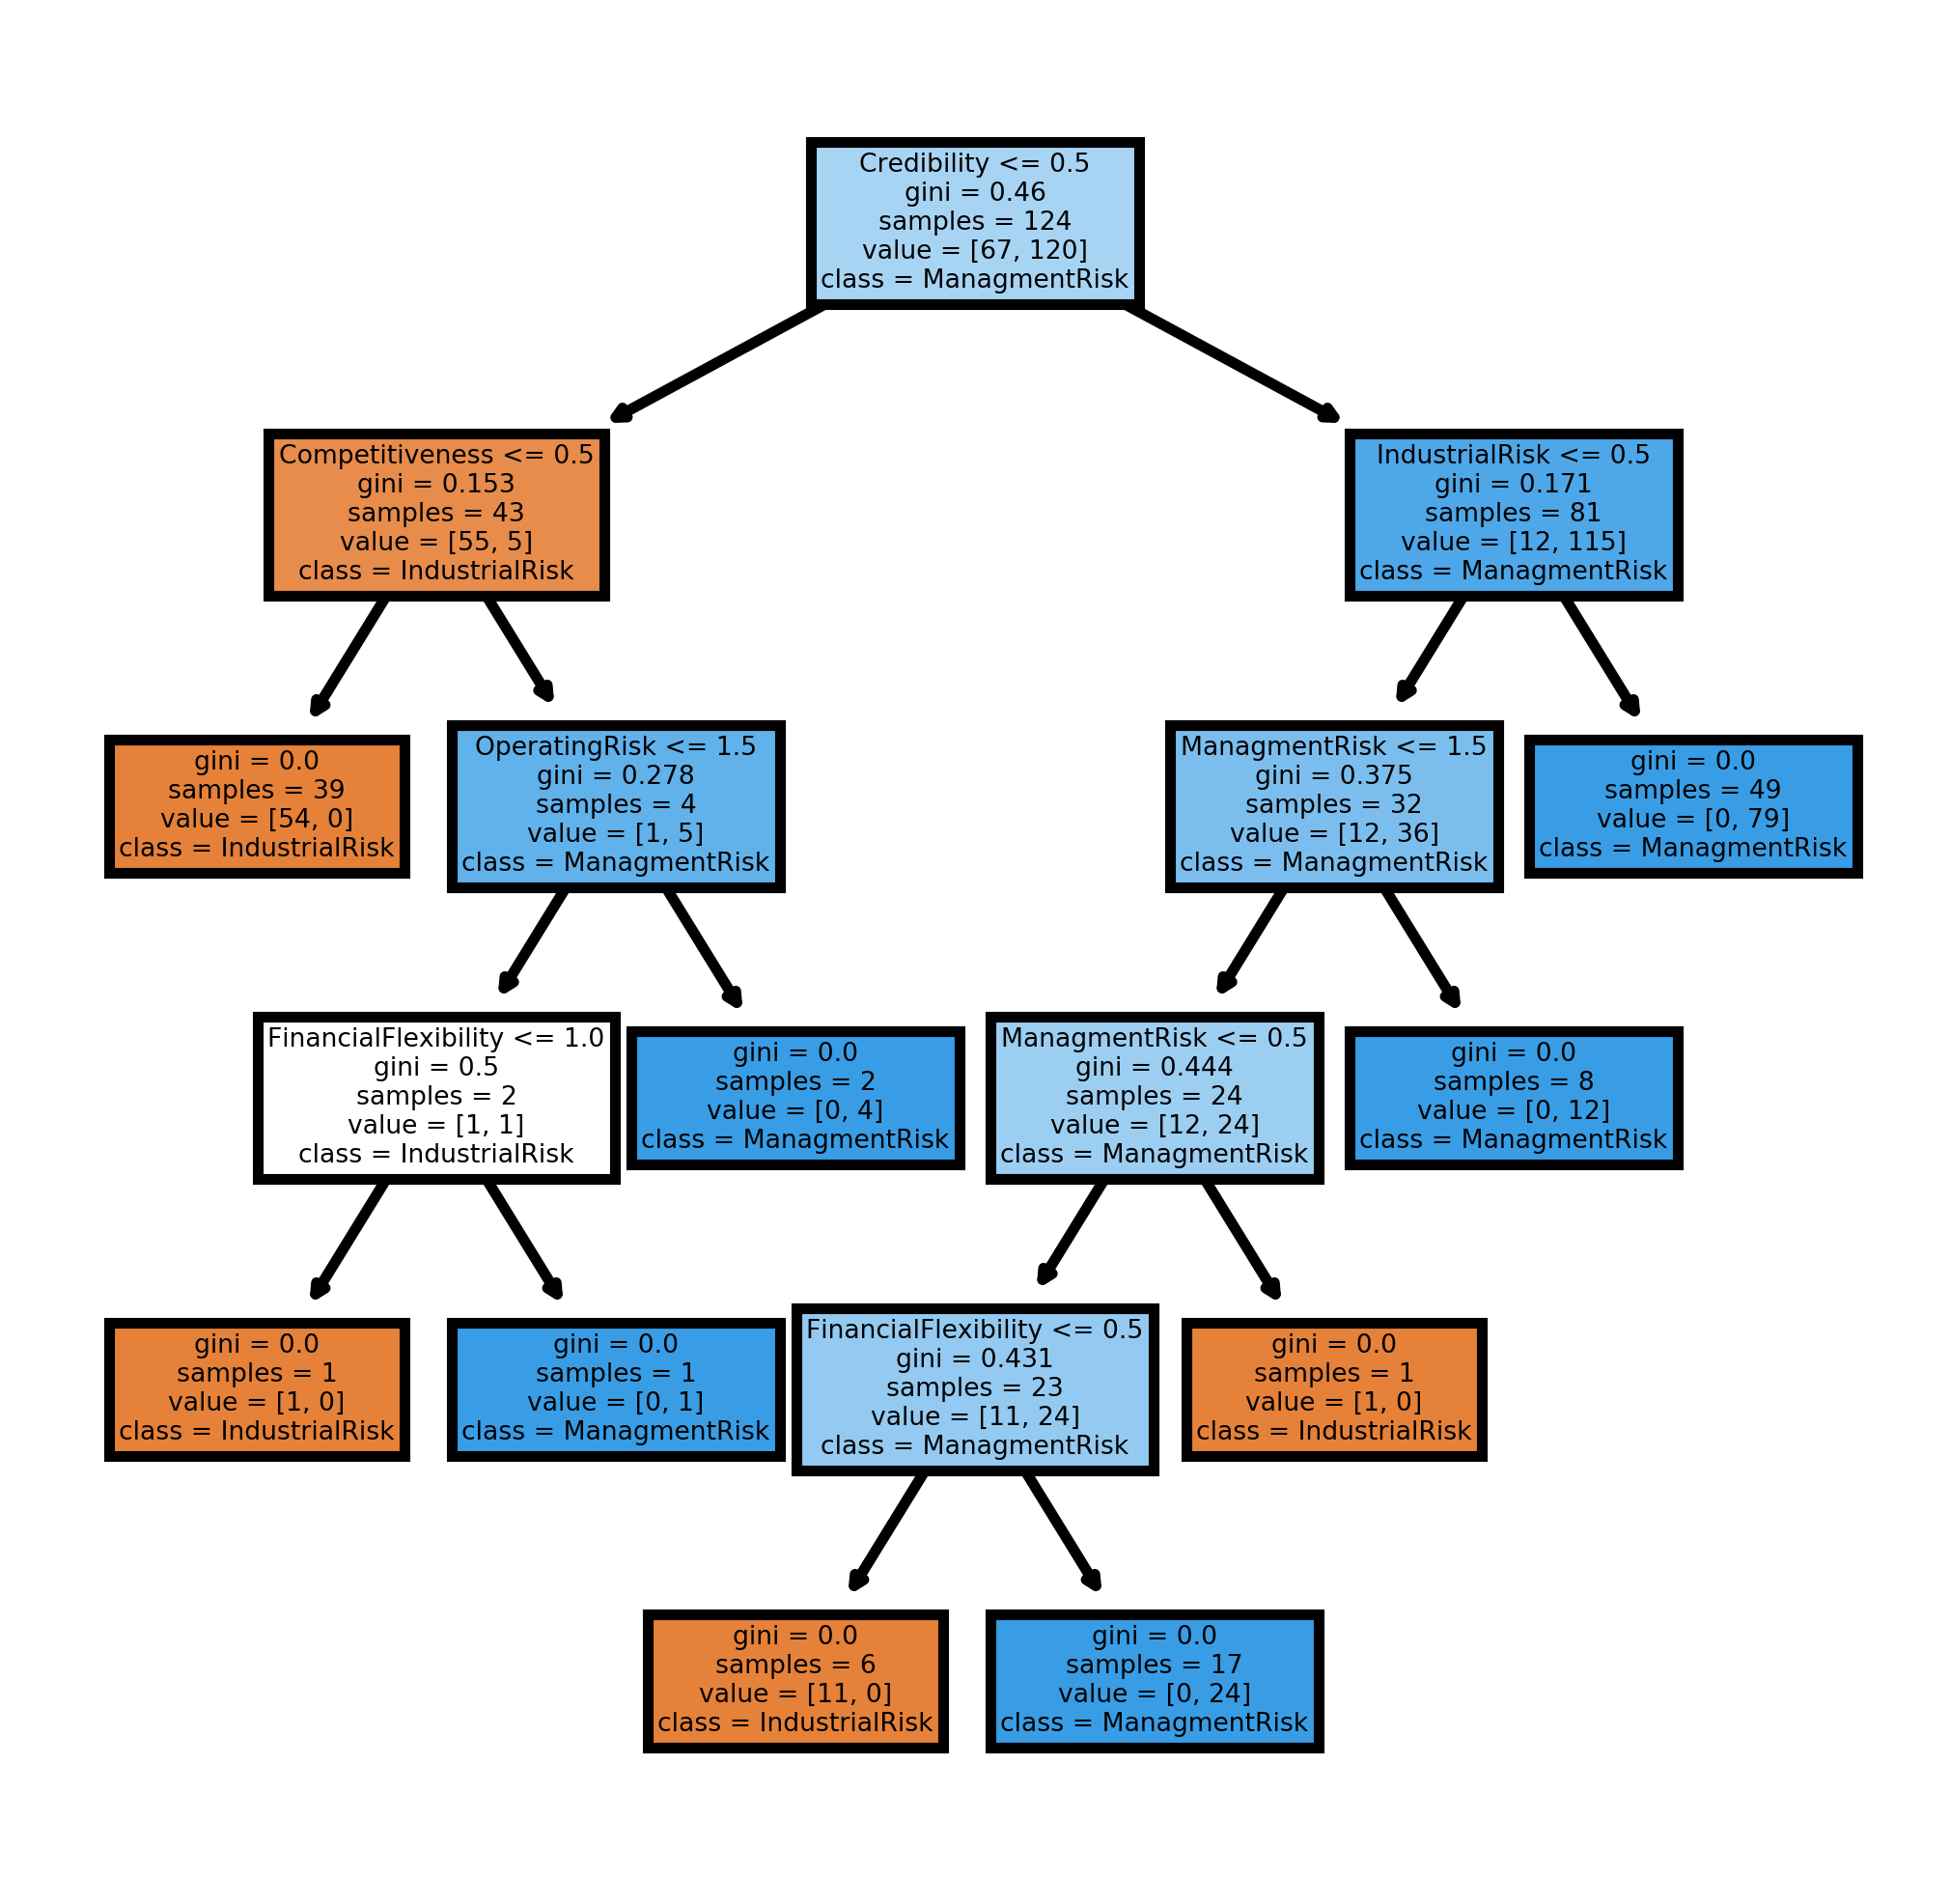

In [194]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=800)

tree.plot_tree(rf.estimators_[0], feature_names= featureList, class_names= featureList , filled = True)

fig.savefig('rfV2Tree.png')

In [190]:
testPredict = np.array([[2,2,1,1,1,2]])
testPredictOut = rf.predict(testPredict)
print(testPredictOut)

[2]


[Text(786.9230769230769, 1585.5, 'Credibility <= 0.5\ngini = 0.46\nsamples = 124\nvalue = [67, 120]'),
 Text(286.15384615384613, 1132.5, 'Competitiveness <= 0.5\ngini = 0.153\nsamples = 43\nvalue = [55, 5]'),
 Text(143.07692307692307, 679.5, 'gini = 0.0\nsamples = 39\nvalue = [54, 0]'),
 Text(429.23076923076917, 679.5, 'OperatingRisk <= 1.5\ngini = 0.278\nsamples = 4\nvalue = [1, 5]'),
 Text(286.15384615384613, 226.5, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(572.3076923076923, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 4]'),
 Text(1287.6923076923076, 1132.5, 'FinancialFlexibility <= 0.5\ngini = 0.171\nsamples = 81\nvalue = [12, 115]'),
 Text(1001.5384615384614, 679.5, 'IndustrialRisk <= 0.5\ngini = 0.464\nsamples = 17\nvalue = [11, 19]'),
 Text(858.4615384615383, 226.5, 'gini = 0.391\nsamples = 8\nvalue = [11, 4]'),
 Text(1144.6153846153845, 226.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 15]'),
 Text(1573.8461538461538, 679.5, 'OperatingRisk <= 1.5\ngini = 0.02\nsamples = 64\n

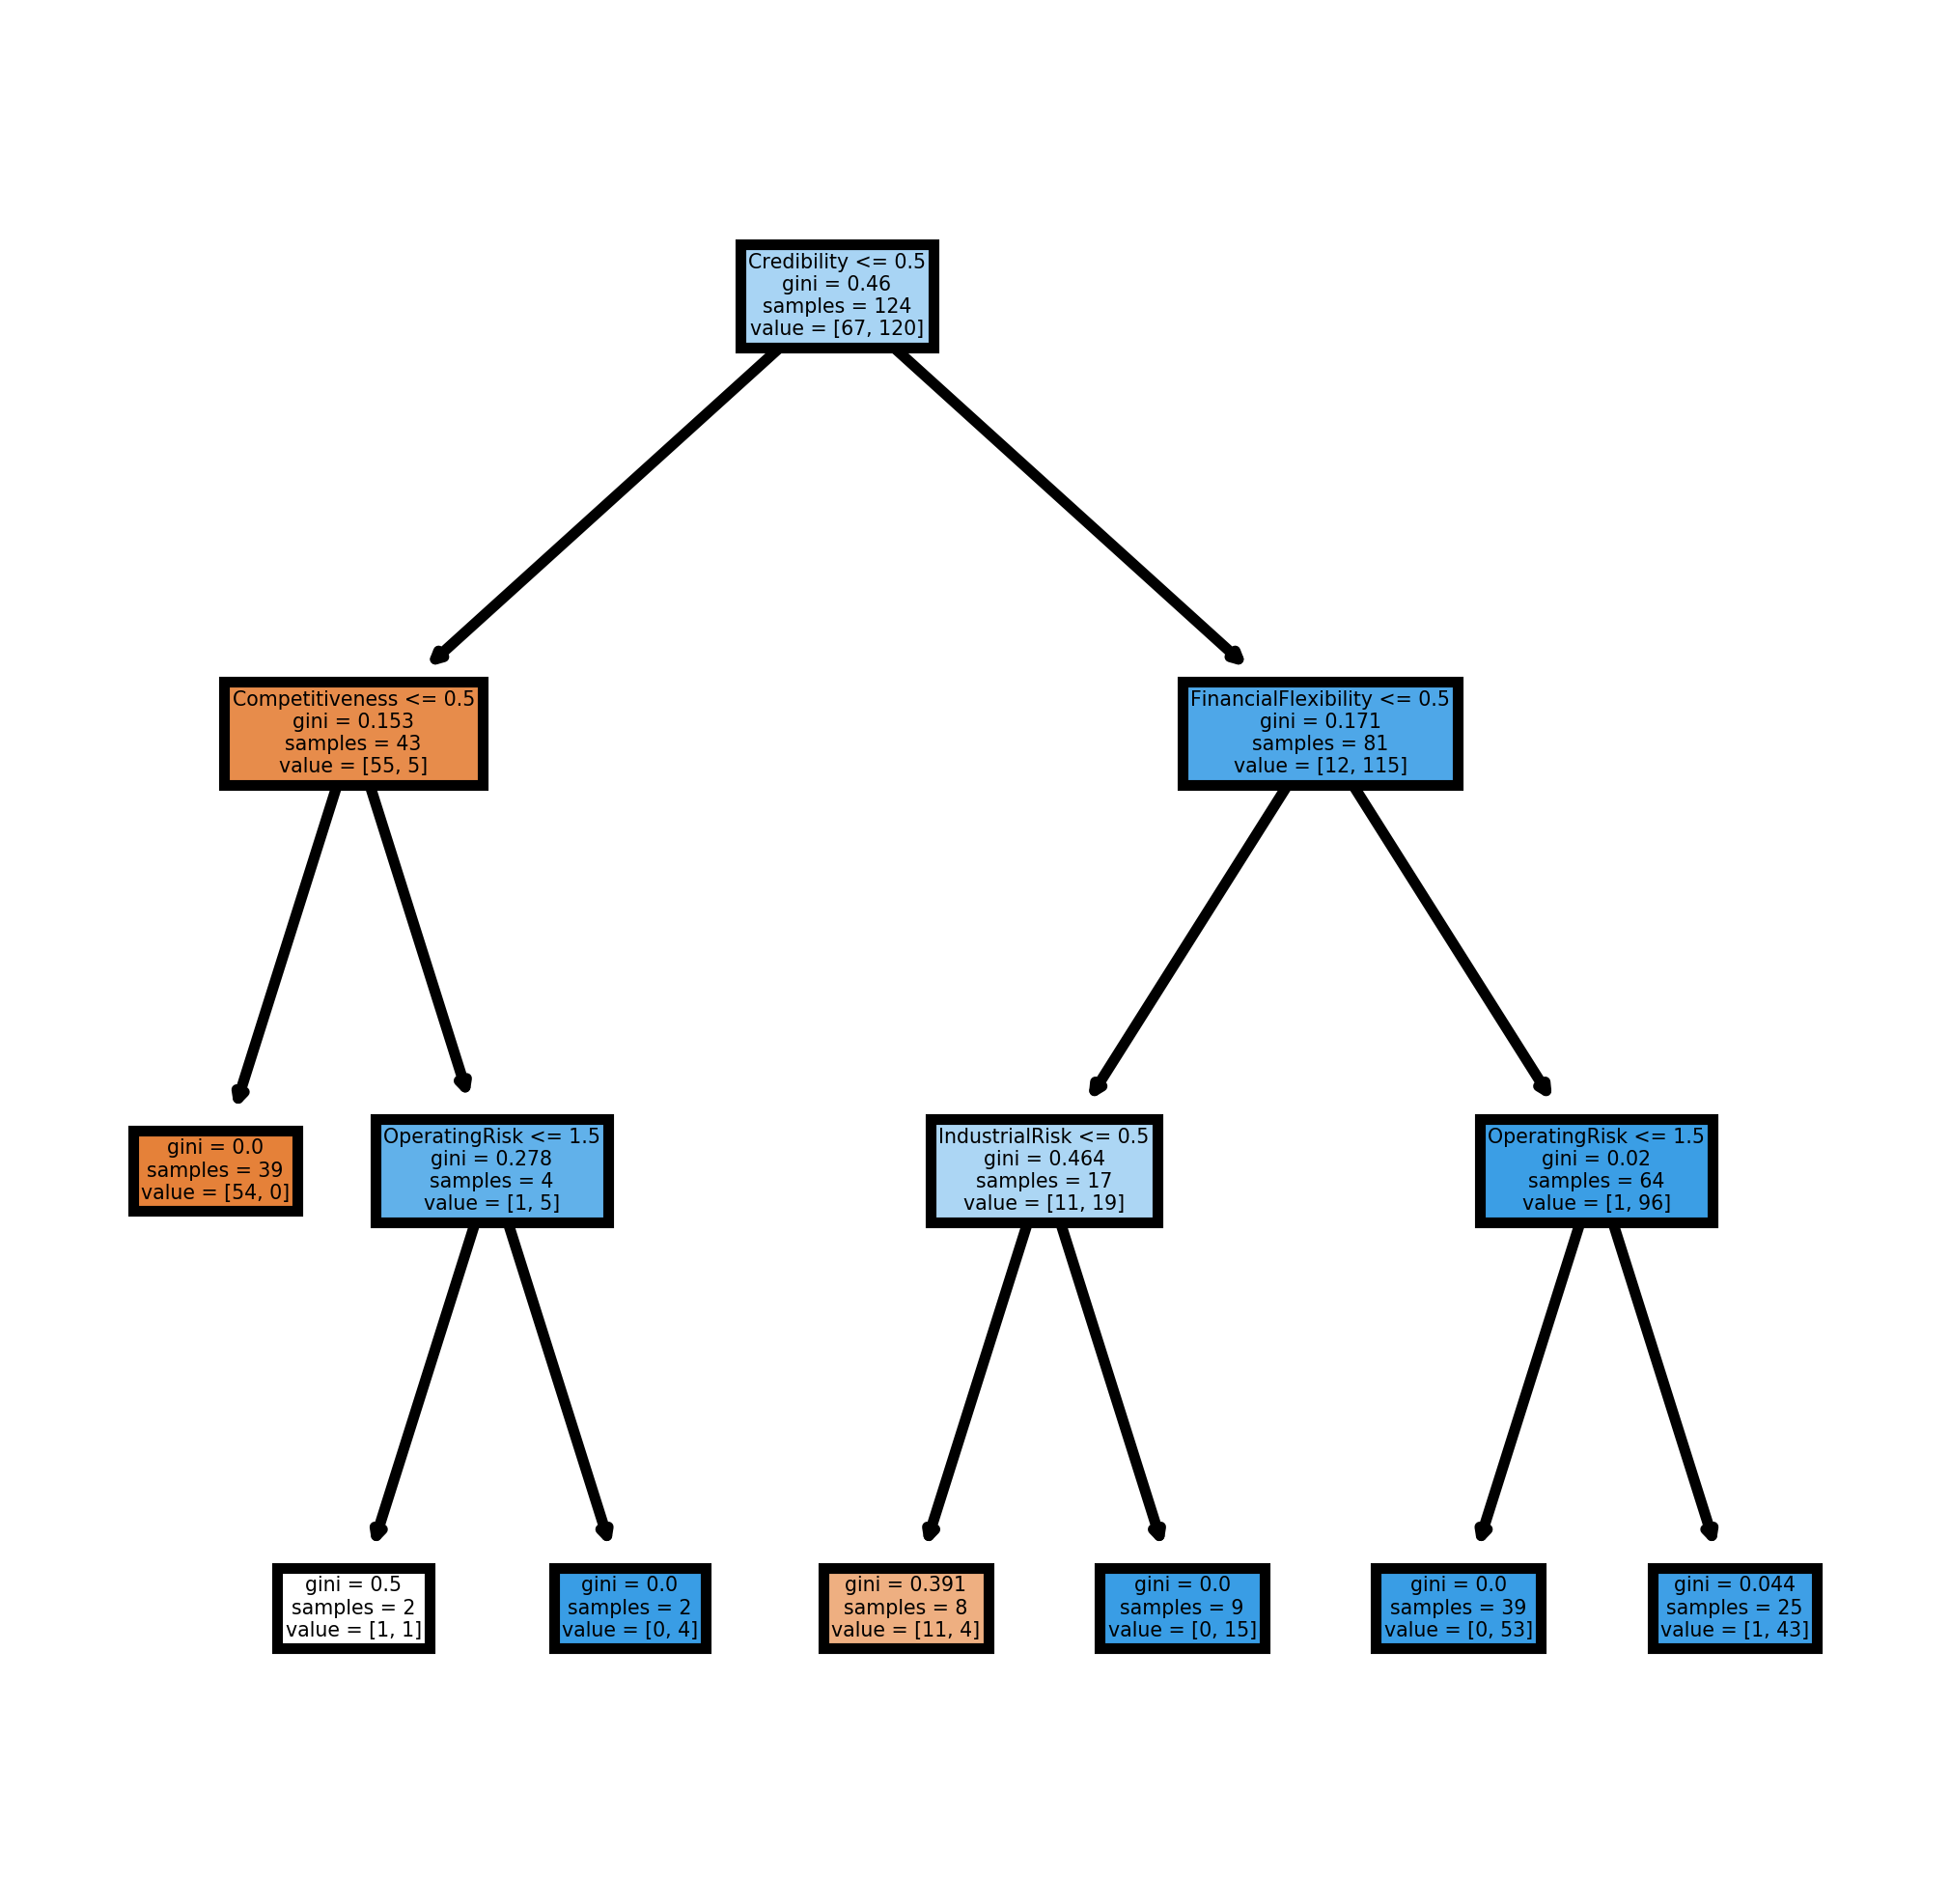

In [191]:
rf3 = RandomForestClassifier(n_estimators= 10, random_state= 42, max_depth= 3)

rf3.fit(train_features, train_labels)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=800)

tree.plot_tree(rf3.estimators_[0], feature_names= featureList, filled = True)

In [192]:
predictions3 = rf3.predict(test_features)
print (predictions3)

errors3 = abs(predictions3 - test_labels)
print (errors3)

print("Mean Absolute Error: ", round(np.mean(errors3), 2))

mape3 = 100* (errors3 / test_labels)
print (mape)

accuracy3 = 100 - np.mean(mape3)
print (accuracy3)

print ('Accuracy: ', round(accuracy3, 2), '%')

[2 2 2 2 2 1 1 1 2 2 1 1 1 1 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2
 1 1 1 2 2 2 1 1 2 1 2 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Mean Absolute Error:  0.0
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
100.0
Accuracy:  100.0 %
